# Support Vector Machines Assignment
---

### Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

### Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.

## Q1: Imports and Data Loading

In [66]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Load data
df = pd.read_csv("../Data/wine_fraud.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


## Q2: EDA and Visualization

1. What are the unique values in the target column we are trying to predict (quality)
2. Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?
3. Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.
4. What percentage of red wines are Fraud? What percentage of white wines are fraud?
5. Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.
6. Create a bar plot of the correlation values to Fraudlent wine.
7. Create a clustermap with seaborn to explore the relationships between variables.

In [68]:
# Unique values in target variable

print(df['quality'].unique())

['Legit' 'Fraud']


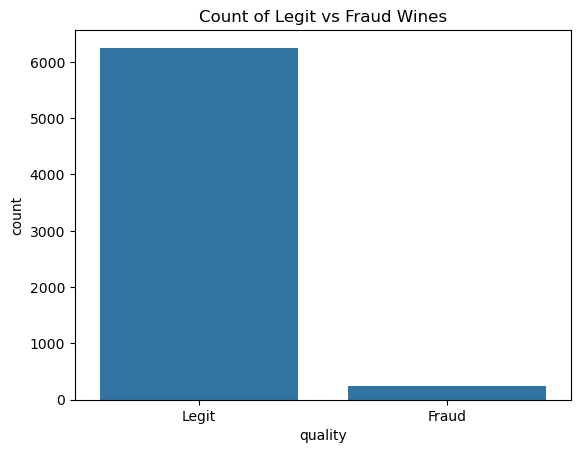

In [69]:
# Countplot of Legit vs Fraud

sns.countplot(x='quality', data=df)
plt.title('Count of Legit vs Fraud Wines')
plt.show()

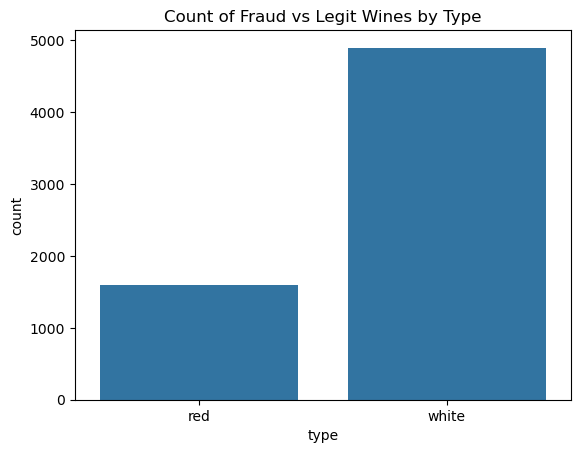

In [70]:
# Wine type countplot

sns.countplot(x='type', data=df)
plt.title('Count of Fraud vs Legit Wines by Type')
plt.show()

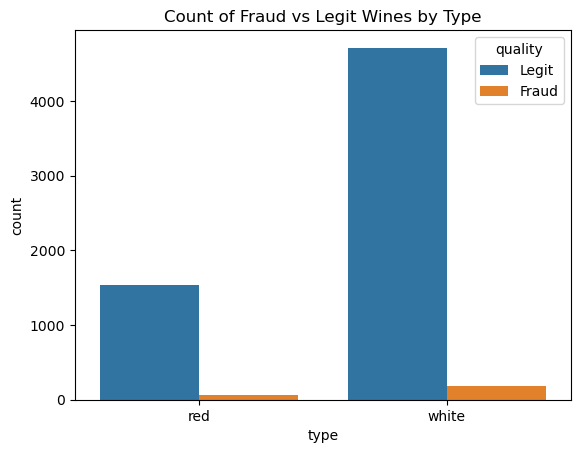

In [71]:
# Countplot of wine type with hue for Fraud vs Legit

sns.countplot(x='type', hue='quality', data=df)
plt.title('Count of Fraud vs Legit Wines by Type')
plt.show()

In [72]:
# % of fraud in red

red_fraud_percentage = df[df['type'] == 'red']['quality'].value_counts()['Fraud'] / len(df[df['type'] == 'red']) * 100
print(f"Percentage of red wines that are Fraud: {red_fraud_percentage:.2f}%")

Percentage of red wines that are Fraud: 3.94%


In [73]:
# % of fraud in white

white_fraud_percentage = df[df['type'] == 'white']['quality'].value_counts()['Fraud'] / len(df[df['type'] == 'white']) * 100
print(f"Percentage of white wines that are Fraud: {white_fraud_percentage:.2f}%")

Percentage of white wines that are Fraud: 3.74%


In [74]:
# Mapping quality to 0 and 1

df['quality'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

# Mapping quality to 0 and 1

df['type'] = df['type'].map({'red': 0, 'white': 1})

In [75]:
# Correlation

correlation = df.corr()['quality']
correlation

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
type                   -0.004598
Name: quality, dtype: float64

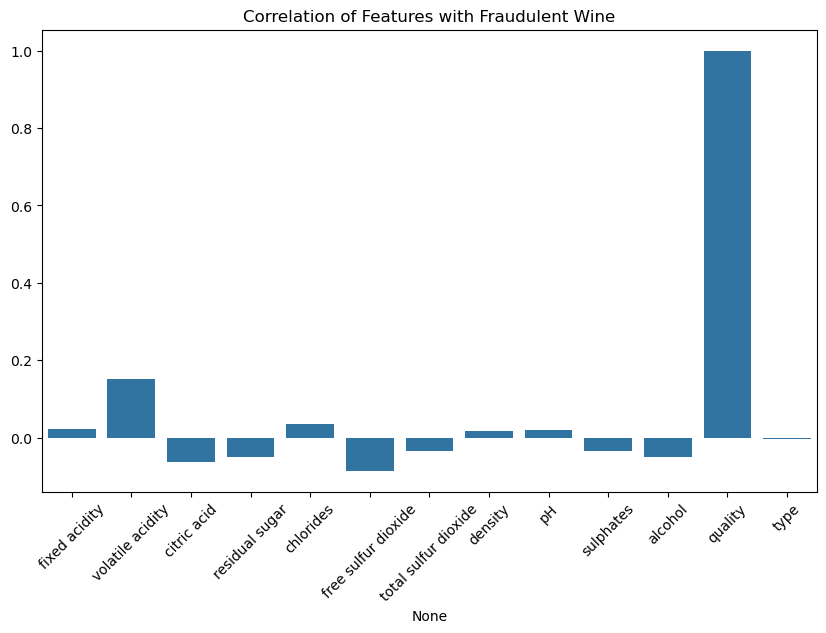

In [76]:
# Correlation barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features with Fraudulent Wine')
plt.xticks(rotation=45)
plt.show()

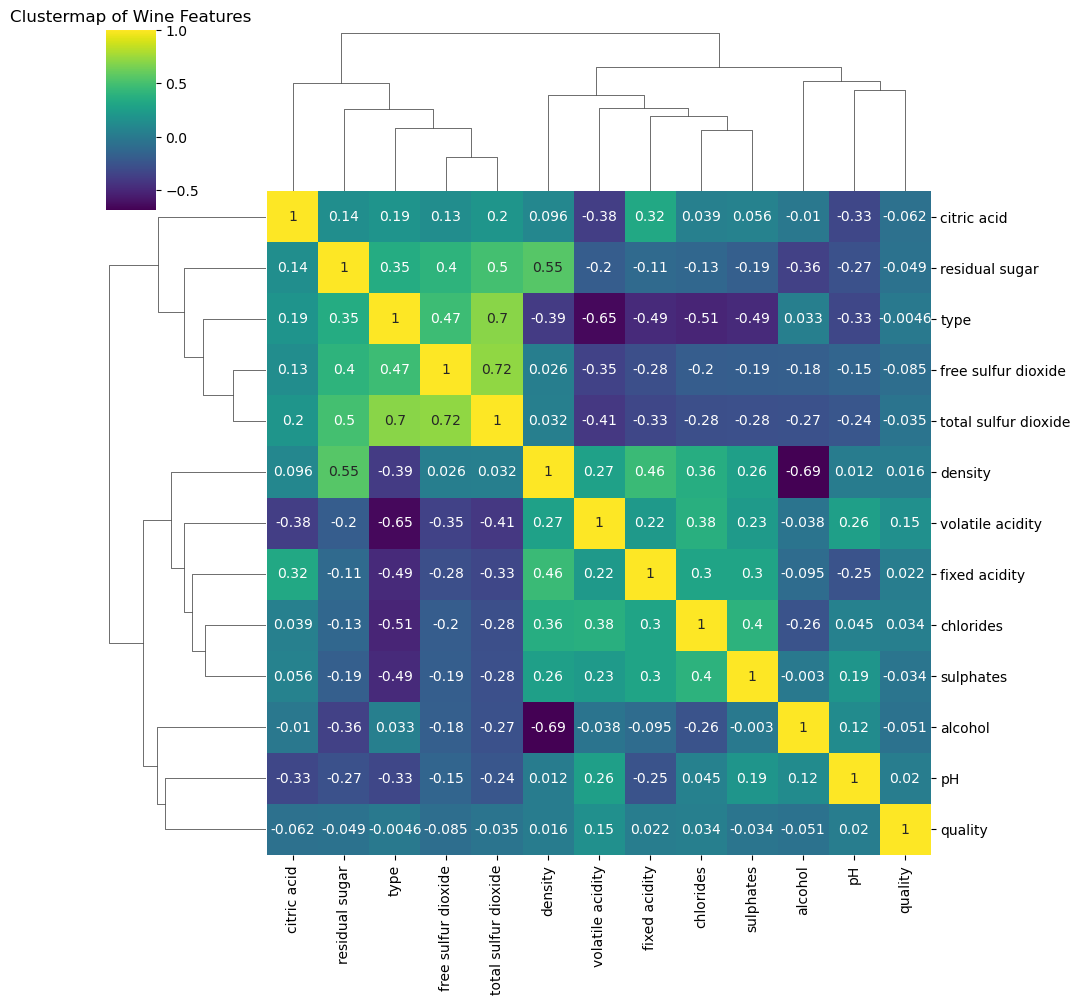

In [77]:
# Clustermap

sns.clustermap(df.corr(), annot=True, cmap='viridis')
plt.title('Clustermap of Wine Features')
plt.show()

## Q3: Prepare Data for Model

1. Convert the categorical column "type" from a string or "red" or "white" to dummy variables
2. Separate the X features from the target variable y
3. Perform a Train|Test split on the data, with a 10% test size. 
4. Scale the X_train and X_test data.

In [78]:
# Dummy variable

df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [79]:
# Separate X and y

X = df.drop('quality', axis=1)
y = df['quality']

In [80]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [81]:
# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Q4: Fit Model

1. Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC] online and look up what the argument\parameter is.
2. Use a GridSearchCV to run a grid search for the best C and gamma parameters.
3. Display the best parameters.

In [82]:
# Instance of model

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an instance of SVC with class_weight='balanced'

model = SVC(class_weight='balanced')

In [83]:
# Gridsearch

param_grid = {'C': [0.01,0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10,50]}

# Create a GridSearchCV object

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 50]},
             scoring='accuracy')

In [84]:
# Best parameters

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 0.1, 'gamma': 10}


## Q5: Evaluate Model

1. Display the confusion matrix and classification report for your model.

In [85]:
# Get the best model from GridSearchCV

best_model = grid_search.best_estimator_

# Predict on the test data

y_pred = best_model.predict(X_test)

In [86]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[624   1]
 [ 23   2]]


In [87]:
# Classification report

from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       0.67      0.08      0.14        25

    accuracy                           0.96       650
   macro avg       0.82      0.54      0.56       650
weighted avg       0.95      0.96      0.95       650



## Great job!